In [6]:
import numpy as np
import matplotlib.pyplot as plt

def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        dists = np.linalg.norm(X[i] - centroids, axis=1)
        idx[i] = np.argmin(dists)
    return idx

def computeCentroids(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        centroids[k, :] = np.mean(X[idx == k, :], axis=0)
    return centroids

def kMeansInitCentroids(X, K):
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]
    return centroids

def kmeans(X, K, num_iters=100):
    centroids = kMeansInitCentroids(X, K)
    for i in range(num_iters):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
    cost = 0
    for k in range(K):#to compute the sumofdistancewithin the cluster
        cost += ((X[idx == k] - centroids[k])**2).sum()
    return cost,idx

def plotElbow(X, K_range):
    costs = []
    for K in K_range:
        cost,_= kmeans(X, K)
        costs.append(cost)
    plt.plot(K_range, costs)
    plt.xlabel('K')
    plt.ylabel('Cost')
    plt.show()




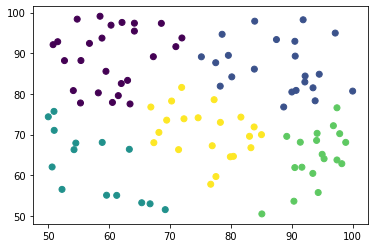

In [10]:
_,idx=kmeans(X, 5, num_iters=100)
plt.scatter(X[:,0],X[:,1],c=idx)
plt.show()

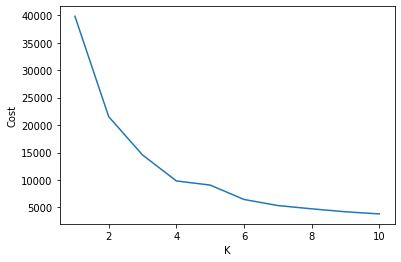

In [7]:

X = np.random.uniform(50, 100, size=(100, 2))
plotElbow(X, range(1, 11))